In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [25]:
# Black-Scholes model for call option price
def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price of a European call option.
    S : spot price (current price of the underlying asset)
    K : strike price
    T : time to maturity (in years)
    r : risk-free interest rate (annualized)
    sigma : volatility (annualized)
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [26]:
# Delta calculation
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

In [27]:
def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return -norm.cdf(-d1)

In [28]:
# Gamma calculation
def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    pdf_d1 = norm.pdf(d1)
    return pdf_d1 / (S * sigma * np.sqrt(T))

In [29]:
# Vega calculation
def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    pdf_d1 = norm.pdf(d1)
    return S * np.sqrt(T) * pdf_d1 * 0.01  # Vega is per 1% change in volatility

In [30]:
# Parameters
S = 100    # Spot price of the underlying asset
K = 100    # Strike price
T = 1      # Time to maturity (1 year)
r = 0.05   # Risk-free rate (5%)
sigma = 0.2 # Volatility (20%)

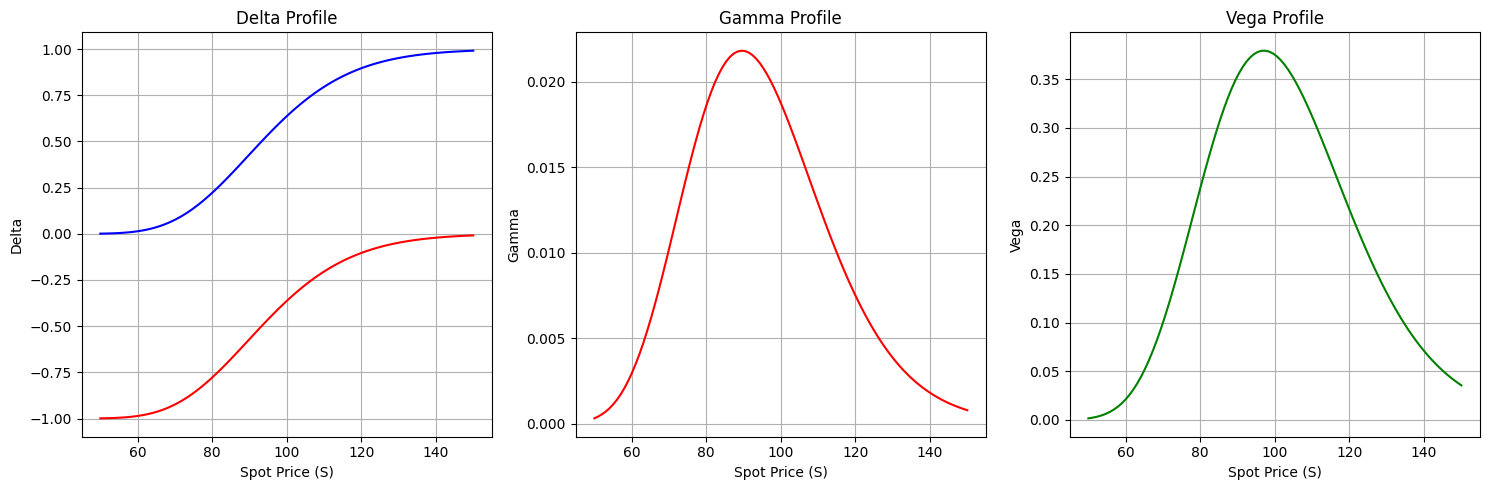

In [31]:
# Generate a range of spot prices and volatilities
S_range = np.linspace(50, 150, 100)  # Spot prices from 50 to 150
sigma_range = np.linspace(0.1, 0.5, 100)  # Volatility range from 10% to 50%

# Calculate Greeks over the range of spot prices
delta_call_values = np.array([delta_call(s, K, T, r, sigma) for s in S_range])
delta_put_values = np.array([delta_put(s, K, T, r, sigma) for s in S_range])
gamma_values = np.array([gamma(s, K, T, r, sigma) for s in S_range])
vega_values = np.array([vega(s, K, T, r, sigma) for s in S_range])

# Plot Delta, Gamma, and Vega profiles
plt.figure(figsize=(15, 5))

# Plot Delta
plt.subplot(1, 3, 1)
plt.plot(S_range, delta_call_values, label='Delta Call', color='blue')
plt.plot(S_range, delta_put_values, label='Delta Put', color='red')
plt.title('Delta Profile')
plt.xlabel('Spot Price (S)')
plt.ylabel('Delta')
plt.grid(True)

# Plot Gamma
plt.subplot(1, 3, 2)
plt.plot(S_range, gamma_values, label='Gamma', color='red')
plt.title('Gamma Profile')
plt.xlabel('Spot Price (S)')
plt.ylabel('Gamma')
plt.grid(True)

# Plot Vega
plt.subplot(1, 3, 3)
plt.plot(S_range, vega_values, label='Vega', color='green')
plt.title('Vega Profile')
plt.xlabel('Spot Price (S)')
plt.ylabel('Vega')
plt.grid(True)

plt.tight_layout()
plt.show()


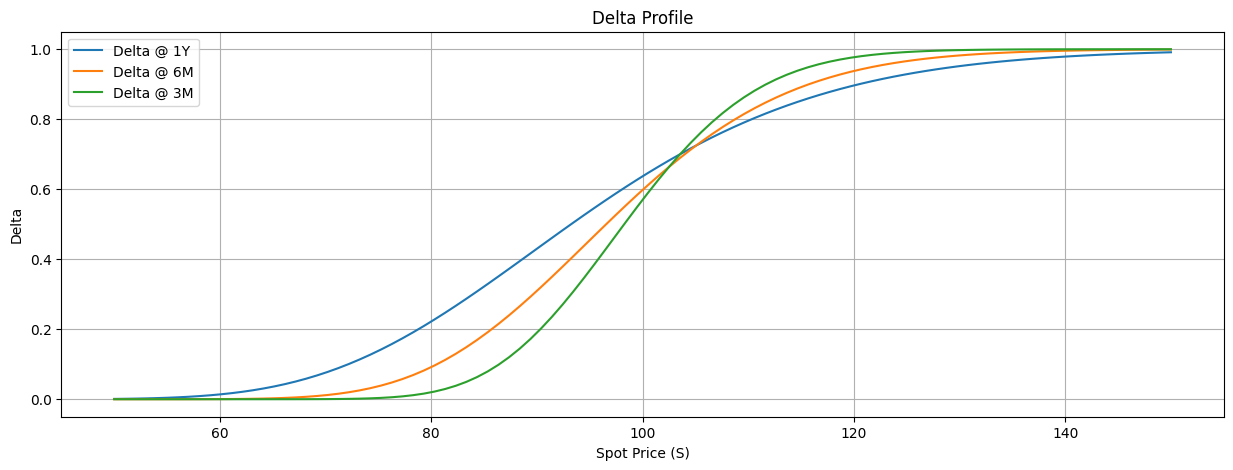

In [32]:
# Behaviour of Delta wrt Time to Maturity
maturities = [1, 0.5, 0.25]  # in years (1 year, 6 months, 3 months)

# Generate a range of spot prices
S_range = np.linspace(50, 150, 100)

# Dictionary to store delta values for each maturity
delta_values = {}

# Calculate delta values for each maturity
for T in maturities:
    delta_values[T] = np.array([delta(s, K, T, r, sigma) for s in S_range])

# Plotting
plt.figure(figsize=(15, 5))

# Plot all delta profiles
for T in maturities:
    plt.plot(S_range, delta_values[T], label=f'Delta @ {int(T*12)}M' if T < 1 else 'Delta @ 1Y')

plt.title('Delta Profile')
plt.xlabel('Spot Price (S)')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()

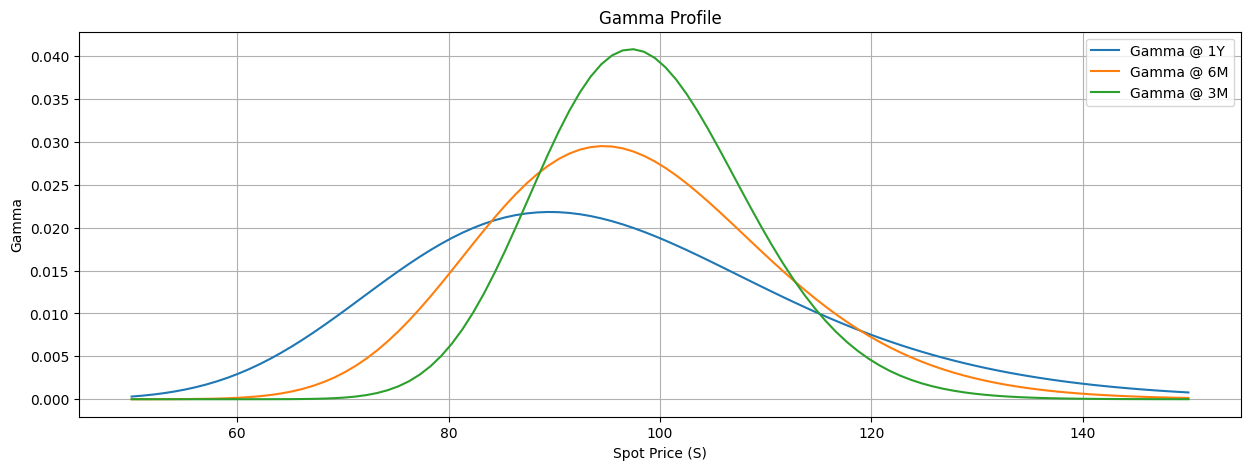

In [33]:
# Behaviour of Gamma wrt Time to Maturity
maturities = [1, 0.5, 0.25]  # in years (1 year, 6 months, 3 months)

# Generate a range of spot prices
S_range = np.linspace(50, 150, 100)

# Dictionary to store delta values for each maturity
gamma_values = {}

# Calculate delta values for each maturity
for T in maturities:
    gamma_values[T] = np.array([gamma(s, K, T, r, sigma) for s in S_range])

# Plotting
plt.figure(figsize=(15, 5))

# Plot all delta profiles
for T in maturities:
    plt.plot(S_range, gamma_values[T], label=f'Gamma @ {int(T*12)}M' if T < 1 else 'Gamma @ 1Y')

plt.title('Gamma Profile')
plt.xlabel('Spot Price (S)')
plt.ylabel('Gamma')
plt.grid(True)
plt.legend()